In [5]:
from notebooks.utils import fetch_runs, get_runs_data

In [6]:
runs = fetch_runs(
    entity="r-alvarezlucendo16", project="incremental-learning", tags_any=["ICLR-Fig1"]
)
df = get_runs_data(runs, metrics=["val_loss", "teacher_val_loss"])

/Users/rodrigoalvarezlucendo/Projects/ar-classification/notebooks/utils.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True, sort=False) if dfs else pd.DataFrame()


In [7]:
# get unique values of teacher val loss
teacher_val_losses = df["teacher_val_loss"].unique()
if len(teacher_val_losses) > 1:
    raise ValueError("More than one unique teacher val loss found.")
teacher_val_loss = teacher_val_losses[0]
print(f"Teacher val loss: {teacher_val_loss}")

Teacher val loss: 0.506292462348938


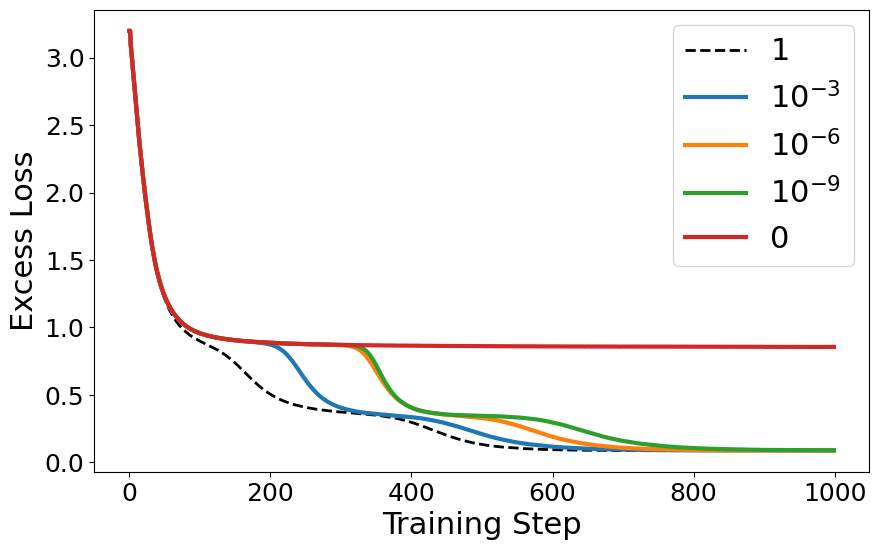

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 6))
groups = df.groupby(["_run_name", "cfg.student.query_init_scale"], dropna=False)["val_loss"]
def sort_key(item):
    scale = item[0][1]
    # Baseline (NaN) first, then others by descending value
    return (0, 0) if pd.isna(scale) else (1, -float(scale))
groups = sorted(groups, key=sort_key)
labels_map = {
    1e-3: r"$10^{-3}$",
    1e-6: r"$10^{-6}$",
    1e-9: r"$10^{-9}$",
    np.nan: r"1",
    0: "0",
}
for (name, query_init_scale), group in groups:
    data = group.tolist() - teacher_val_loss
    data = data[:1000]
    if np.isnan(query_init_scale):
        plt.plot(data, label=labels_map[np.nan], linestyle="--", color="black", linewidth=2)
    else:
        plt.plot(data, label=labels_map[query_init_scale], linewidth=3)

plt.ylabel("Excess Loss", fontsize=22)
plt.xlabel("Training Step", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=22)
plt.savefig("figures/minimal-transformer-init_scales.pdf", bbox_inches="tight")